## EDA of PowerCo Churn Data

## Importing Libraries & Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [17]:
# Load the data
client_df = pd.read_csv('DATASET/client_data.csv')
pd.set_option('display.max_columns', 50)
price_df = pd.read_csv('DATASET/price_data.csv')

## Data Exploration

### Viewing Client Data

In [5]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [19]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

The datatype of 4 date columns needs to converted to date

In [20]:
# convert the date columns to datetime
for d in ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']:
    client_df[d] = pd.to_datetime(client_df[d])

In [104]:
# Extract the year the date active and end columns
client_df['contract_start_year'] = client_df['date_activ'].dt.year
client_df['contract_end_year'] = client_df['date_end'].dt.year

#### Checking for Missing and Duplicate Values


In [16]:
# No of rows and columns
print(f"The dataset has {client_df.shape[0]} rows and {client_df.shape[1]} columns")

# Missing values
print(f'{client_df.isnull().sum()}\nNo missing values in the client dataset')

# Check for duplicates
print(f'{client_df.duplicated().sum()}\nNo duplicates in the client dataset')

The dataset has 14606 rows and 28 columns
id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
contract_start_year   

#### Check for the consitency of the Categorical variables

In [21]:
# checking consistency of cat var using proportions
cat_col = client_df.dtypes[client_df.dtypes == 'object'].index.to_list()
if len(cat_col) !=0:
    print(f'Category columns are:{cat_col}')
    for cat in cat_col:
        desc_fr = client_df[cat].value_counts().reset_index(name = 'count')
        desc_fr['proportion'] = desc_fr['count']/len(client_df)
        print(f'{desc_fr}\n')
else:
    print('No categorical columns in the dataset')

Category columns are:['id', 'channel_sales', 'has_gas', 'origin_up']
                                     id  count  proportion
0      24011ae4ebbe3035111d65fa7c15bc57      1    0.000068
1      2fae70276cd7a4874a2aefcd68d5a184      1    0.000068
2      a7a9dac0ffc2ad56c66a1b08d53d0e51      1    0.000068
3      6cfbce2099a4163ea4fe422fb28829ea      1    0.000068
4      4289e929ecd35a0754e697feb24a091b      1    0.000068
...                                 ...    ...         ...
14601  0b69432a3ceee7763bf86ffe30c6bc2d      1    0.000068
14602  6cabca88c760284183f51f84e4a27b1e      1    0.000068
14603  de92494d7140dc94be6a1ebafaf98056      1    0.000068
14604  a8e828bfad0869527e9acdd39a36cc91      1    0.000068
14605  563dde550fd624d7352f3de77c0cdfcd      1    0.000068

[14606 rows x 3 columns]

                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413
1                           MISSING   3725    0.255032
2  lmkebamcaaclubfxadlmueccxoim

- There is no consistency issue
- Values of Channel_sales and Origin up seems not understandable.

#### Label Encoding the Cat Variable

In [22]:
# Encoding the variable using LabelEncoder to make it numerical
client_df['channel_sales'] = LabelEncoder().fit_transform(client_df['channel_sales'])
client_df['origin_up'] = LabelEncoder().fit_transform(client_df['origin_up'])

In [23]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,4,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,2,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,2,13.856,0
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,2,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,2,19.800,0


#### Checking Consistency in Num Variable

In [34]:
# check consistency of numerical variables 
int_col = client_df.dtypes[client_df.dtypes == 'int'].index.to_list()
float_col = client_df.dtypes[client_df.dtypes == 'float'].index.to_list()

num_col = int_col + float_col

client_df[num_col].describe().T.assign(skew=client_df[num_col].skew())
#skeewness
#client_df[num_col].skew()

,count,mean,std,min,25%,50%,75%,max,skew
channel_sales,14606.0,3.266945,2.183223,0.0,0.000000,4.000000,4.000000,7.000000,-0.314053
origin_up,14606.0,3.178899,0.887801,0.0,2.000000,3.000000,4.000000,5.000000,-0.506807
forecast_cons_12m,14606.0,1868.614880,2387.571531,0.0,494.995000,1112.875000,2401.790000,82902.830000,7.155853
forecast_discount_energy,14606.0,0.966726,5.108289,0.0,0.000000,0.000000,0.000000,30.000000,5.155098
forecast_meter_rent_12m,14606.0,63.086871,66.165783,0.0,16.180000,18.795000,131.030000,599.310000,1.505148
forecast_price_energy_off_peak,14606.0,0.137283,0.024623,0.0,0.116340,0.143166,0.146348,0.273963,-0.119586
forecast_price_energy_peak,14606.0,0.050491,0.049037,0.0,0.000000,0.084138,0.098837,0.195975,-0.014331
forecast_price_pow_off_peak,14606.0,43.130056,4.485988,0.0,40.606701,44.311378,44.311378,59.266378,-4.998772
imp_cons,14606.0,152.786896,341.369366,0.0,0.000000,37.395000,193.980000,15042.790000,13.198799
margin_gross_pow_ele,14606.0,24.565121,20.231172,0.0,14.280000,21.640000,29.880000,374.640000,4.472632


**Observation**:\
The dataset shows considerable variability across features, with notable skewness and outliers. Key observations include:

- Skewness: Features like forecast_cons_12m, net_margin, and imp_cons exhibit significant positive skew, indicating a long tail of high values. In contrast, features like channel_sales and origin_up are slightly negatively skewed.

- Outliers: High maximum values in net_margin, pow_max, and imp_cons suggest the presence of extreme outliers, which may impact analysis and model performance.

- Distributions: Features with close mean and median values (e.g., margin_net_pow_ele) are more symmetrically distributed, while large discrepancies (e.g., forecast_discount_energy, imp_cons) indicate skewed distributions.

- Variability: Large standard deviations in features like forecast_cons_12m and imp_cons point to widely dispersed data, whereas features like forecast_price_energy_off_peak show tighter clustering

In [35]:
# check consistency of date columns
date_col = client_df.dtypes[client_df.dtypes == 'datetime64[ns]'].index.to_list()
if len(date_col) !=0:
    print(f'Date columns are:{date_col}')

client_df[date_col].describe().T

Date columns are:['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']


,count,mean,min,25%,50%,75%,max
date_activ,14606,2011-01-28 07:54:18.879912448,2003-05-09 00:00:00,2010-01-15 00:00:00,2011-03-04 00:00:00,2012-04-19 00:00:00,2014-09-01 00:00:00
date_end,14606,2016-07-27 20:48:26.422018560,2016-01-28 00:00:00,2016-04-27 06:00:00,2016-08-01 00:00:00,2016-10-31 00:00:00,2017-06-13 00:00:00
date_modif_prod,14606,2013-01-02 12:29:10.951663872,2003-05-09 00:00:00,2010-08-12 00:00:00,2013-06-19 00:00:00,2015-06-16 00:00:00,2016-01-29 00:00:00
date_renewal,14606,2015-07-21 06:59:00.353279488,2013-06-26 00:00:00,2015-04-17 00:00:00,2015-07-27 00:00:00,2015-10-29 00:00:00,2016-01-28 00:00:00


### Viewing Price Data

In [36]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [37]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [38]:
# convert the date columns to datetime
price_df['price_date'] = pd.to_datetime(price_df['price_date'])

#### Checking for Missing and Duplicate values

In [39]:
# check for missing values
print(f'{price_df.isnull().sum()}\nNo missing values in the price dataset')

# check for duplicates
print(f'{price_df.duplicated().sum()}\nNo duplicates in the price dataset')

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64
No missing values in the price dataset
0
No duplicates in the price dataset


#### Checking for Consistency in Cat Var

In [42]:
# check consistency of numerical variables
price_num_col = price_df.dtypes[price_df.dtypes == 'float'].index.to_list()
if len(price_num_col) !=0:
    print(f'Numerical columns are:{price_num_col}')

price_df[price_num_col].describe().T.assign(skew=price_df[price_num_col].skew())

Numerical columns are:['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']


,count,mean,std,min,25%,50%,75%,max,skew
price_off_peak_var,193002.0,0.141027,0.025032,0.0,0.125976,0.146033,0.151635,0.280700,-0.311879
price_peak_var,193002.0,0.054630,0.049924,0.0,0.000000,0.085483,0.101673,0.229788,-0.133292
price_mid_peak_var,193002.0,0.030496,0.036298,0.0,0.000000,0.000000,0.072558,0.114102,0.365508
price_off_peak_fix,193002.0,43.334477,5.410297,0.0,40.728885,44.266930,44.444710,59.444710,-2.889775
price_peak_fix,193002.0,10.622875,12.841895,0.0,0.000000,0.000000,24.339581,36.490692,0.471709
price_mid_peak_fix,193002.0,6.409984,7.773592,0.0,0.000000,0.000000,16.226389,17.458221,0.433076


## Data Visualization

#### Methods for plotting Bar and Stacked Chart

In [65]:
# Method to plot bar chart with percentage labels

def plot_bar_chart_with_percent_label(df, target_variable, sort_by_percent=False, label_offset=0, figsize=(9, 6)):
    # Prepare data
    plot_data = df[target_variable].value_counts(normalize=True).reset_index()
    plot_data.columns = [target_variable, 'percent']
    if sort_by_percent:
        plot_data = plot_data.sort_values(by='percent', ascending=False)
    else:
        plot_data = plot_data.sort_values(by=target_variable)

    # Plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=plot_data[target_variable],palette='hls', 
                     edgecolor='.2',hue=target_variable)
    
    # Add percentage labels
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + label_offset
        ax.annotate(f'{p.get_height() * 100:.2f}%', xy=(x, y), ha='center')

    ax.set_ylabel('Proportion')
    ax.margins(y=0.1)
    plt.show() 

In [98]:
# Method to plot stacked bar chart
def plot_stacked_bar_chart(df, target_variable, group_variable, sort_by_first_group=False, figsize=(9, 6)):

    # Prepare data
    plot_data = df.groupby([target_variable, group_variable]).size().unstack(fill_value=0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if sort_by_first_group:
        plot_data = plot_data.sort_values(by=plot_data.columns[0])

    # Plot
    ax = plot_data.plot(kind='bar', stacked=True, figsize=figsize, color=sns.color_palette('husl', len(plot_data.columns)), edgecolor='.2')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=360, ha='right')
    plt.legend(title=group_variable, loc='upper center', ncol=len(plot_data.columns))
    
    # Add percentage labels
    for p in ax.patches:
        if p.get_height() > 0:
            x = p.get_x() + p.get_width() / 2
            y = p.get_y() + p.get_height() / 2
            ax.annotate(f'{p.get_height() * 100:.1f}%', xy=(x, y), ha='center', va='center', fontsize=10)

    ax.set_ylabel('Proportion')
    ax.margins(y=0.1)
    plt.show()

### Data Visuals & Insights

#### Analysis of Discrete Variable

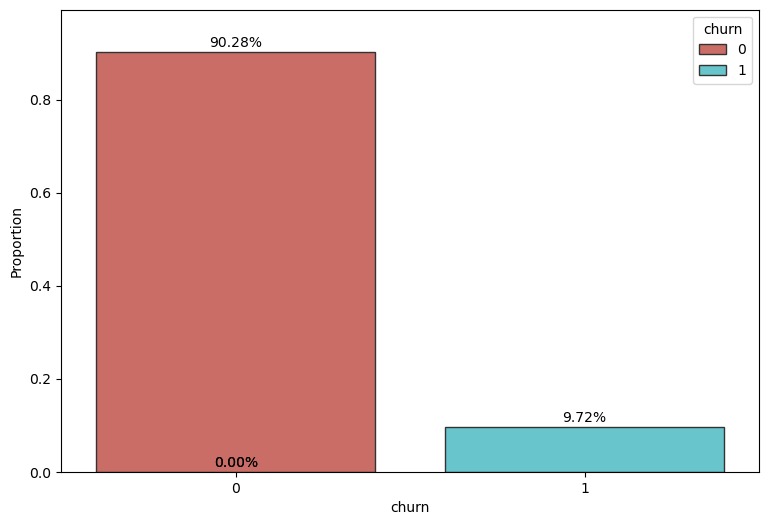

In [66]:
# Plot the distribution of the target variable
plot_bar_chart_with_percent_label(df=client_df, target_variable='churn', sort_by_percent=False,
                                  label_offset=0.01, figsize=(9, 6))

**Insights:**
- We can observe that **9.72%** people leave for other company

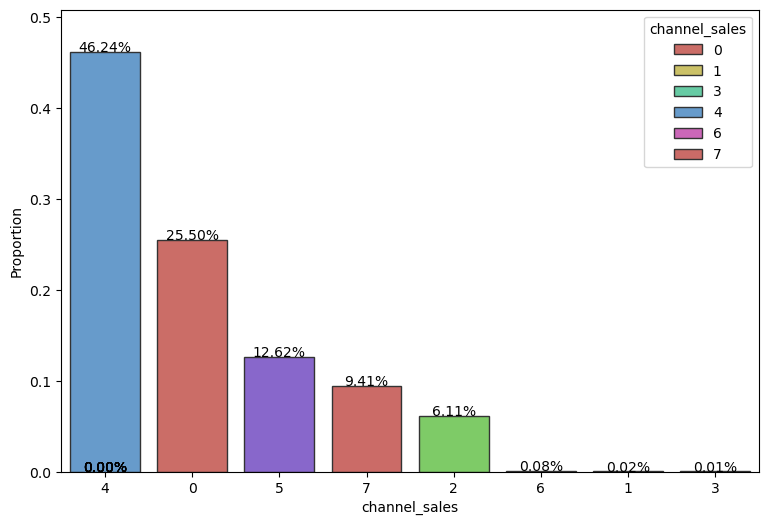

In [68]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='channel_sales', sort_by_percent=True, 
                                  label_offset=0, figsize=(9, 6))

**Insights:**
- Type 4 seems to be the most common sales channel. Type 1, 3 and 6 sales channels are very rare.

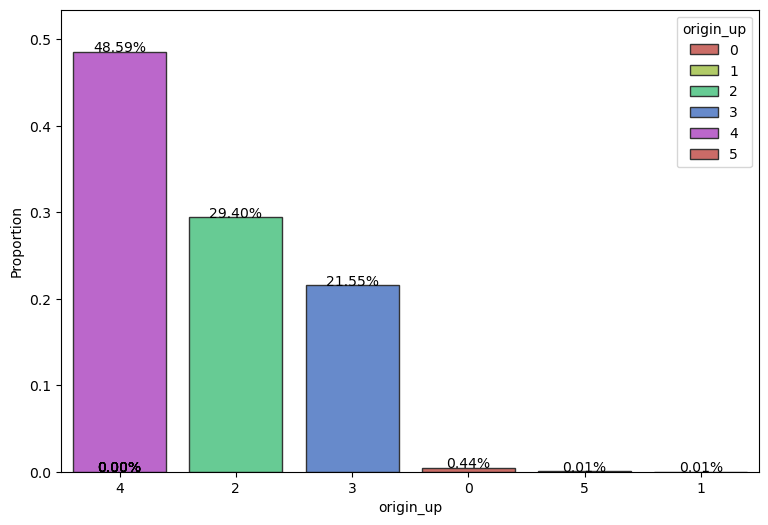

In [70]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='origin_up', sort_by_percent=True, figsize=(9, 6))

**Insights:**
- Type 4 campaign emerged as the most preferred choice for first-time electricity subscribers
- Types 0, 1, and 5 showed significantly lower initial subscription rates
- This clear subscription pattern indicates strong customer preference for Type 4's offering

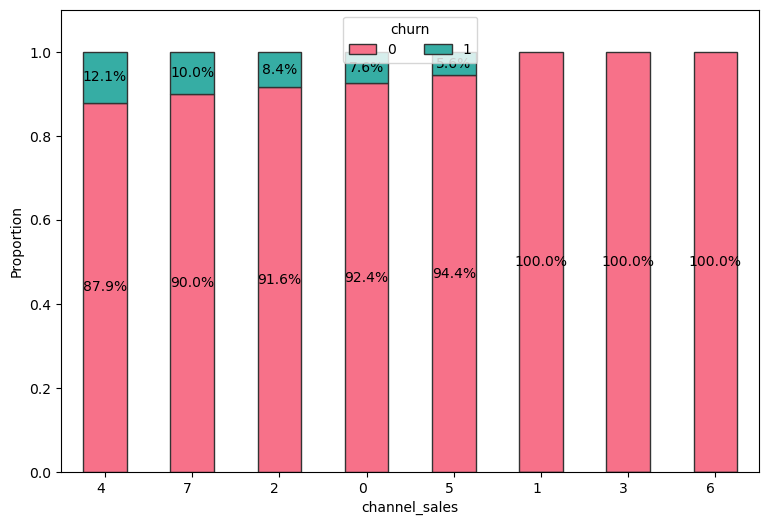

In [99]:
# Plot the distribution of the target variable by channel sales
plot_stacked_bar_chart(df=client_df, target_variable='channel_sales', group_variable='churn', sort_by_first_group=True,figsize=(9, 6)) 

**Insights:**
- Customer churn rates vary significantly across sales channels, ranging from 5.6% to 12.1%
- Analysis excludes uncommon or rare sales channels for more accurate comparison
- The difference between best and worst performing channels is substantial - with worst performing channels having more than double the churn rate of the best ones

In [105]:
client_df.head()
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  int32         
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

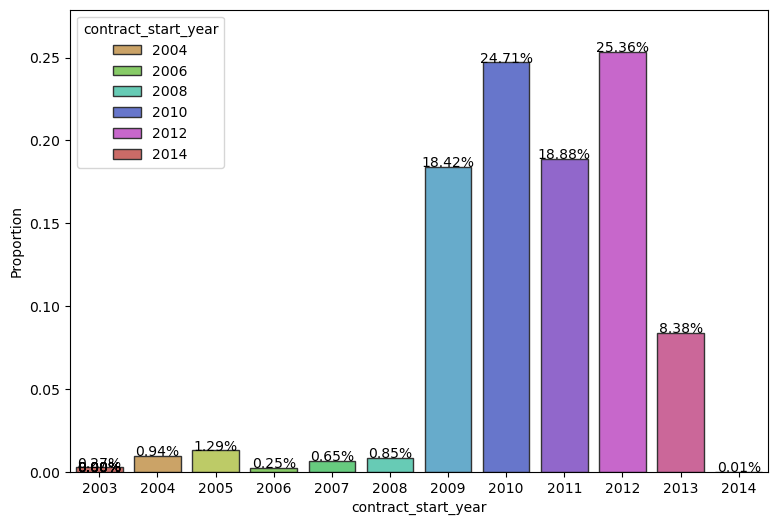

In [107]:
# plot the distribution of the contract start year
plot_bar_chart_with_percent_label(df=client_df, target_variable='contract_start_year', sort_by_percent=False, figsize=(9, 6))

**Insights:**
- The majority of customer contracts were initiated between 2009-2013
- A clear trend emerges where customers who joined more recently show higher tendency to switch providers

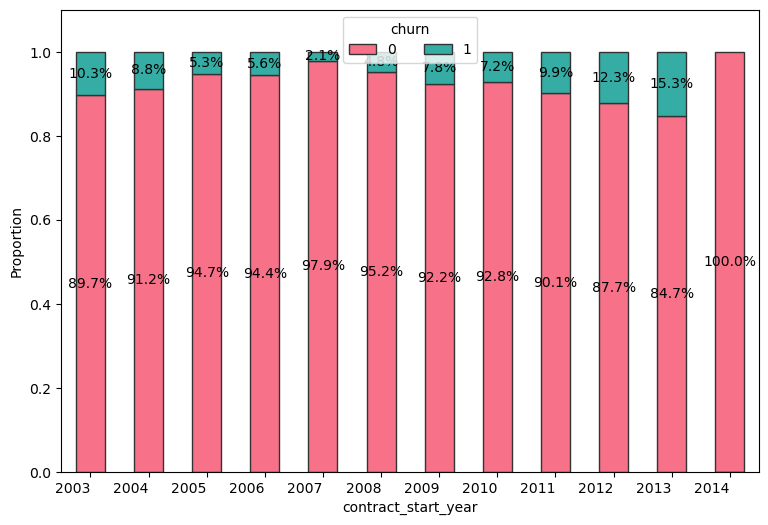

In [110]:
# plot the distribution of the contract start year by churn
plot_stacked_bar_chart(df=client_df, target_variable='contract_start_year', group_variable='churn', 
                       sort_by_first_group=False, figsize=(9, 6))

**Insights:**
- We can observe that churn is increasing for new customers.

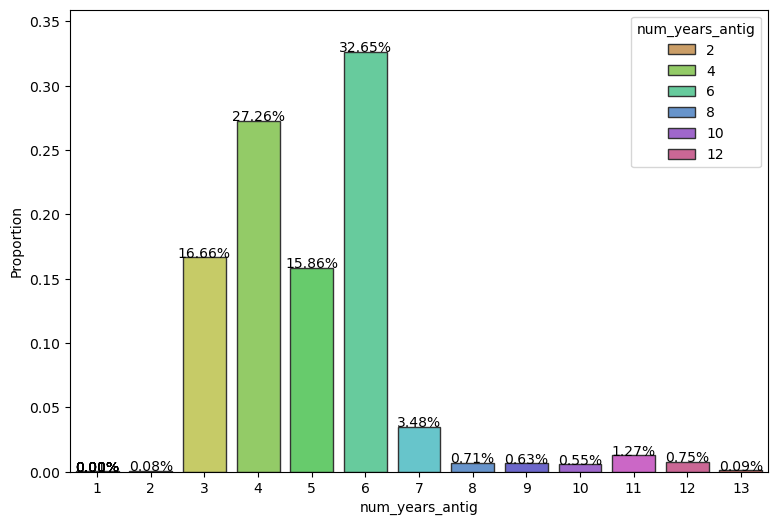

In [111]:
# plot the distribution of the number of years the client has been company
plot_bar_chart_with_percent_label(df=client_df, target_variable='num_years_antig', sort_by_percent=False, figsize=(9, 6))

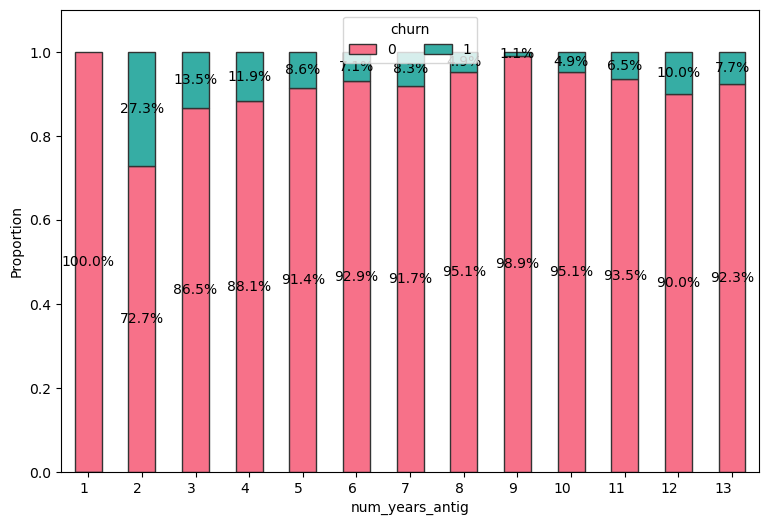

In [112]:
plot_stacked_bar_chart(df=client_df, target_variable='num_years_antig', group_variable='churn',figsize=(9, 6))

**Insights:**
- Customer tenure falls within the 3-6 year range
- A noticeable pattern shows higher churn rates among customers with shorter relationships (newer customers)
- The likelihood of switching providers appears to decrease as the customer relationship duration increases, suggesting stronger loyalty among long-term customers

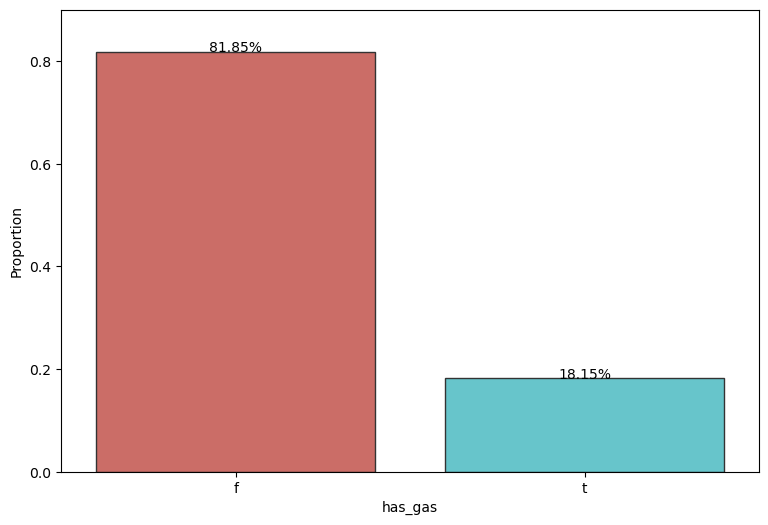

In [113]:
# plot the distribution of the has gas variable
plot_bar_chart_with_percent_label(df=client_df, target_variable='has_gas', sort_by_percent=False, figsize=(9, 6))

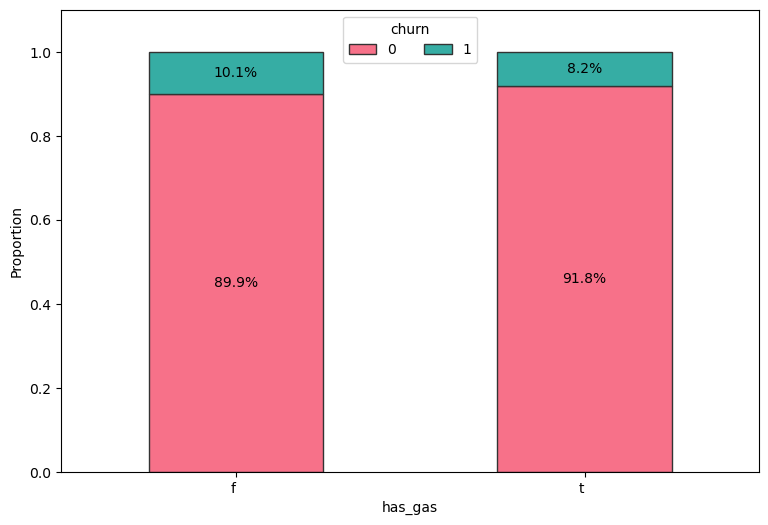

In [114]:
# plot the distribution of the has gas by churn
plot_stacked_bar_chart(df=client_df, target_variable='has_gas', group_variable='churn', figsize=(9, 6))

**Insights:**
- 18.15% of the clients where gas clients.
- Electricity clients seem to churn more than the gas clients.

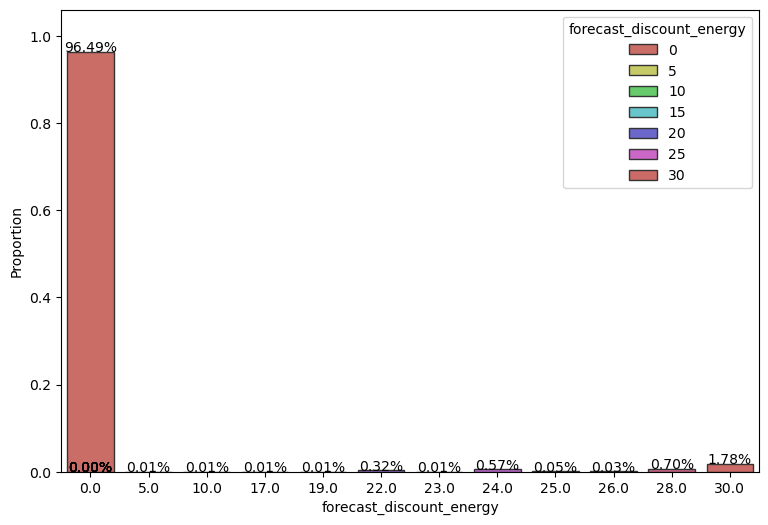

In [ ]:
# plot the distribution of the forcast value of current discount
plot_bar_chart_with_percent_label(df=client_df, target_variable='forecast_discount_energy', 
                                  sort_by_percent=False, figsize=(9, 6))

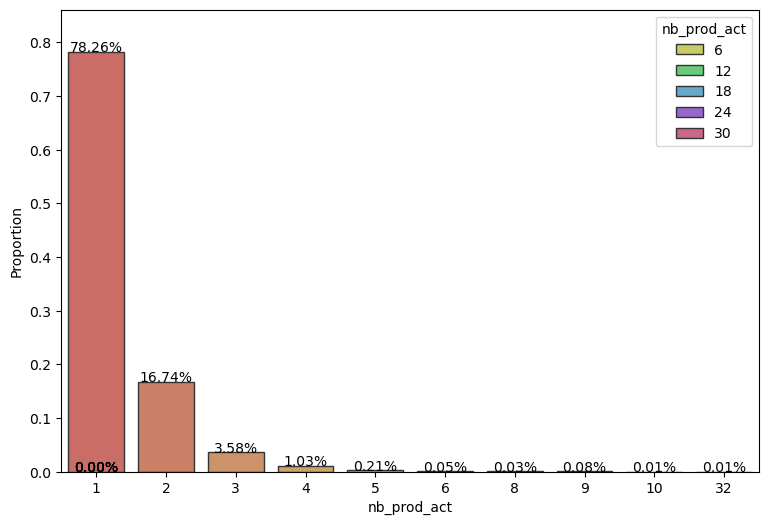

In [119]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='nb_prod_act',sort_by_percent=False, figsize=(9, 6))

**Insights:**
- Product 1 and 2 seemed to be mostly used by the customer

#### Analysis of Continous Variable

In [120]:
# method to plot histogram of numerical variables
def plot_hist_churn(df, target_variable, bins=10, figsize=(9, 6)):
    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=target_variable, hue='churn', bins=bins, kde=True, palette='husl', edgecolor='.2')
    plt.show()

#### Viewing Client Data

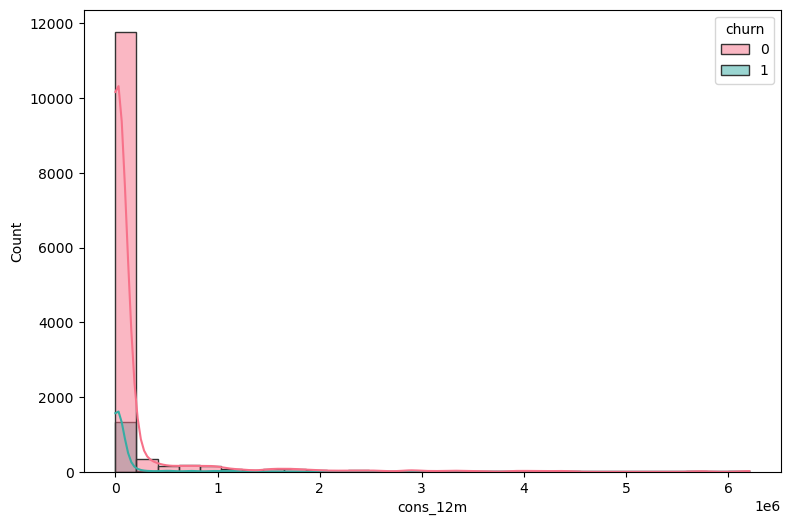

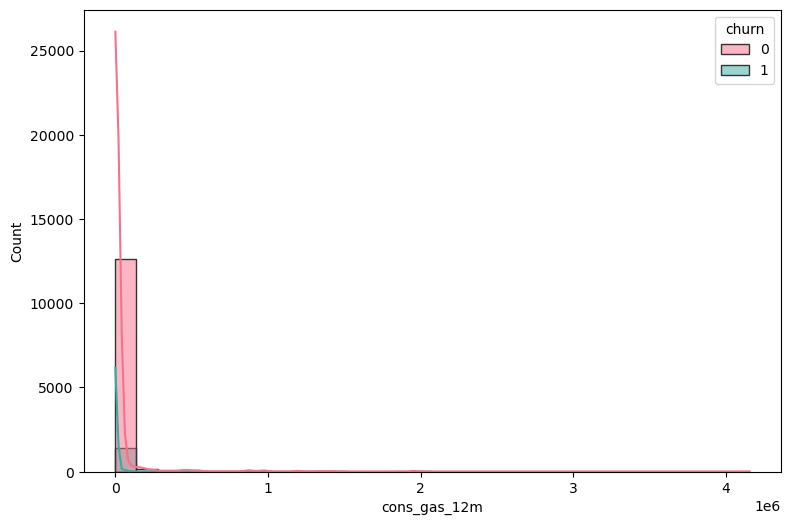

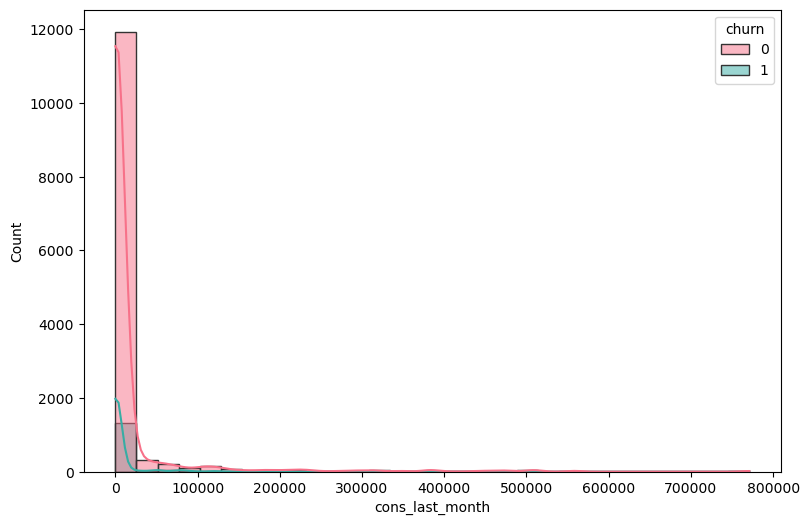

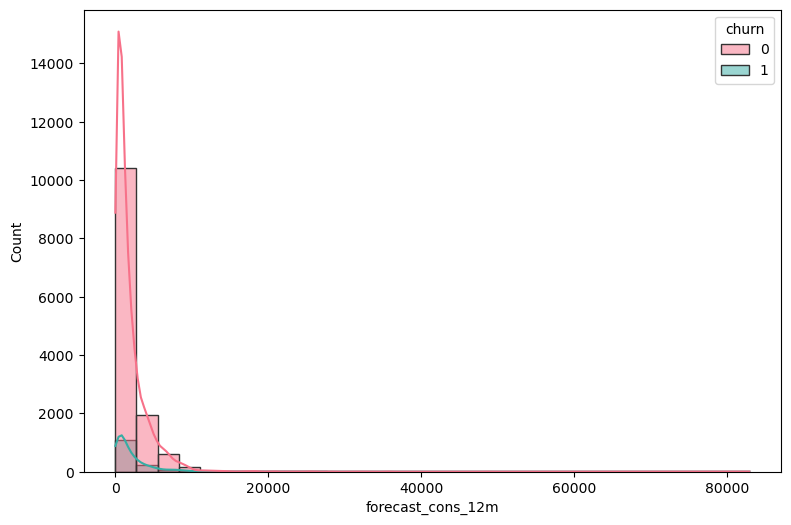

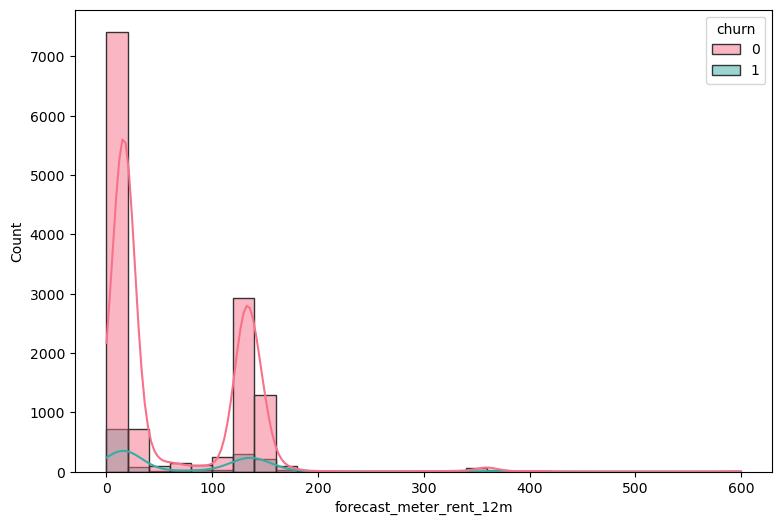

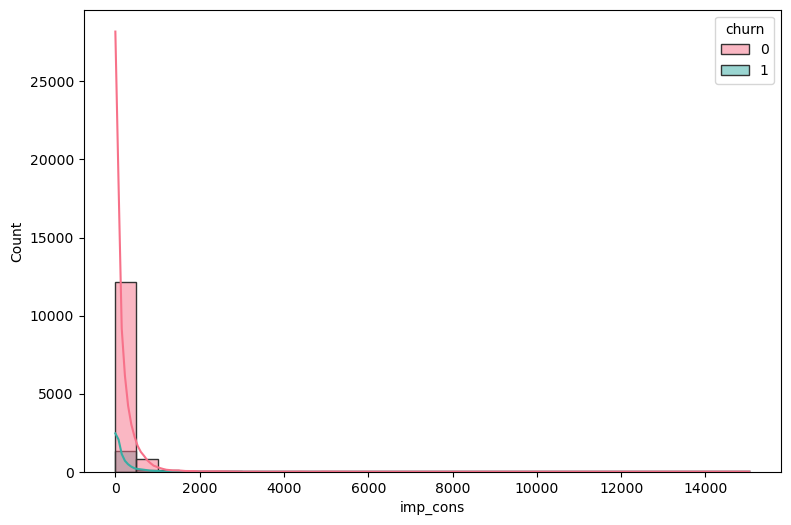

In [121]:
# plot consumption variables
for i in ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_meter_rent_12m', 'imp_cons']:
    plot_hist_churn(df=client_df, target_variable=i, bins=30, figsize=(9, 6))

**Insights:**
- Energy consumption distribution are right skewed shows the presence of outliers.
- Shows the need for transformation

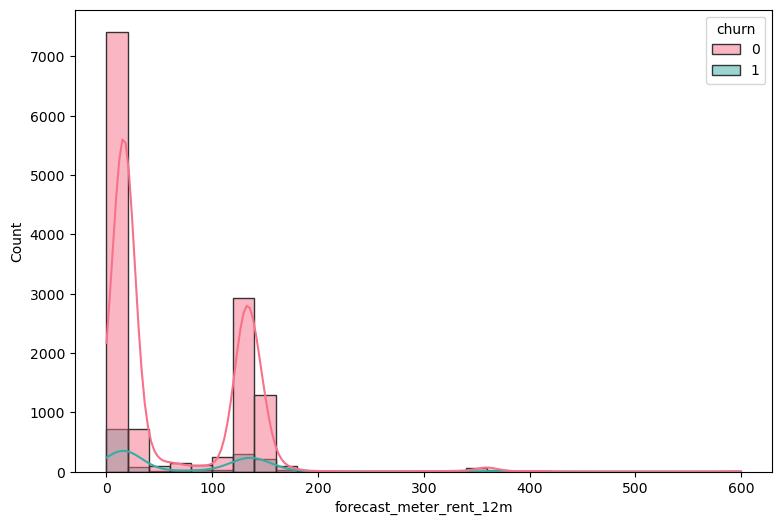

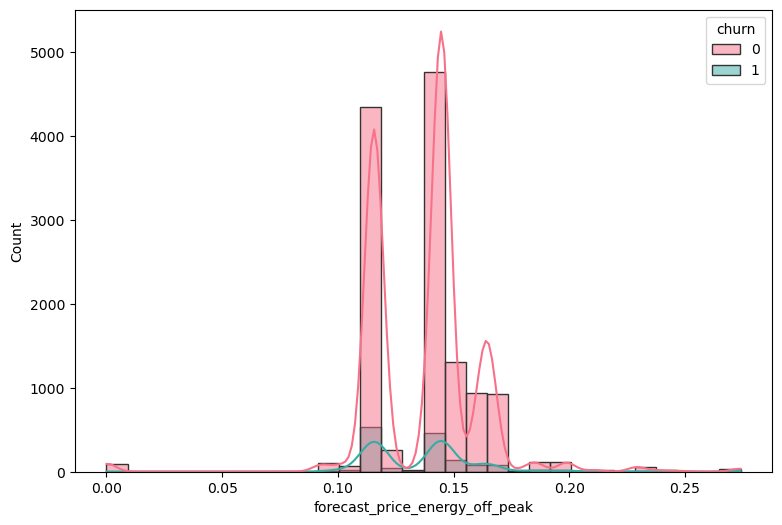

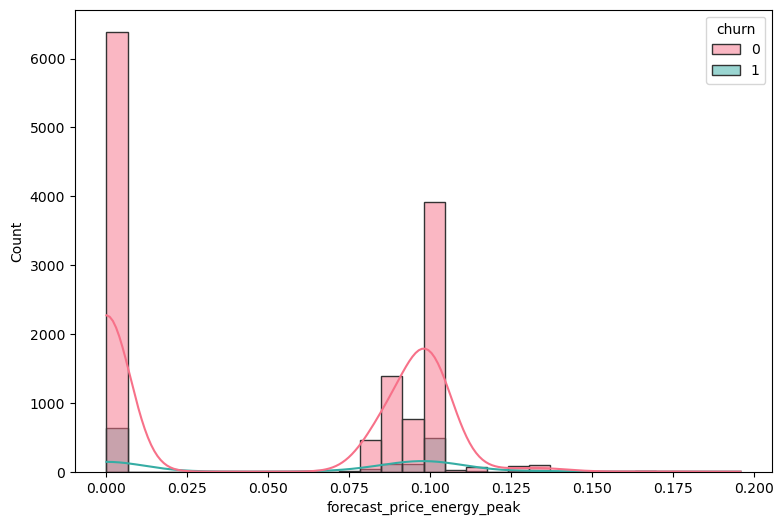

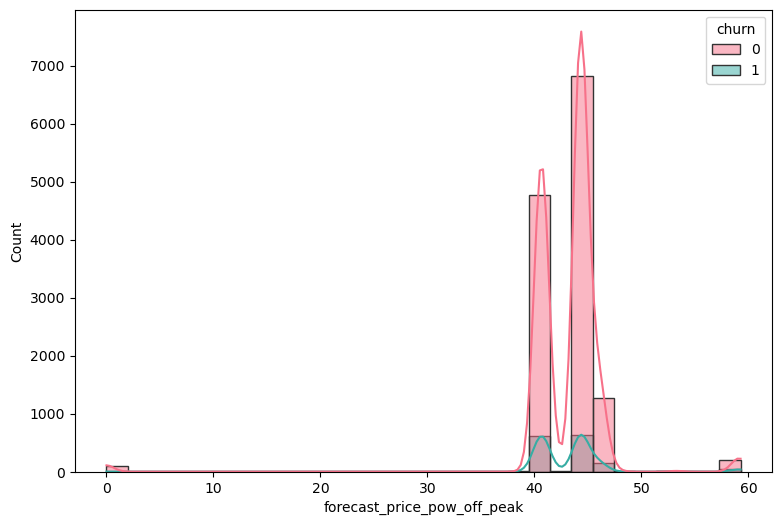

In [ ]:
# plot the distribution of the forecast price energy off peak
for i in ['forecast_meter_rent_12m','forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']:
    plot_hist_churn(df=client_df, target_variable=i, bins=30, figsize=(9, 6))

#### Viewing Price Data

In [128]:
# Join the client and price data
df = client_df.merge(price_df, on='id', how='inner')

C:\Users\adnan\AppData\Local\Temp\ipykernel_35672\213875431.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=price_df, x=i, bins=30, kde=True, palette='husl', edgecolor='.2')


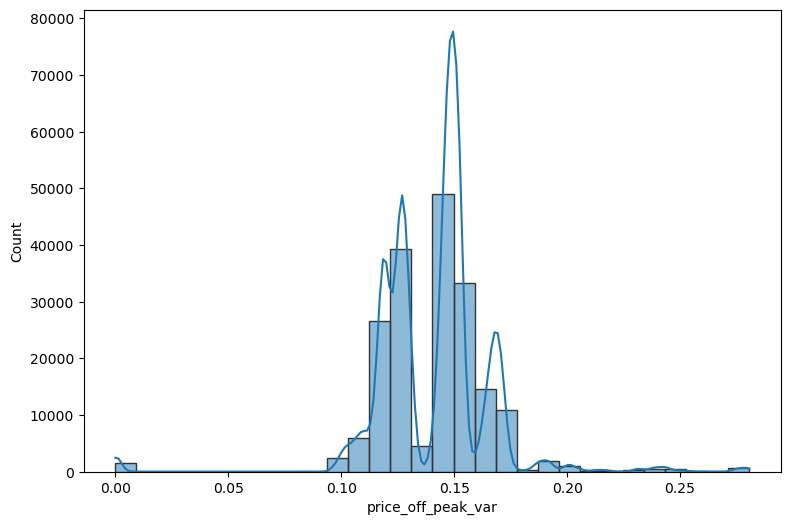

C:\Users\adnan\AppData\Local\Temp\ipykernel_35672\213875431.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=price_df, x=i, bins=30, kde=True, palette='husl', edgecolor='.2')


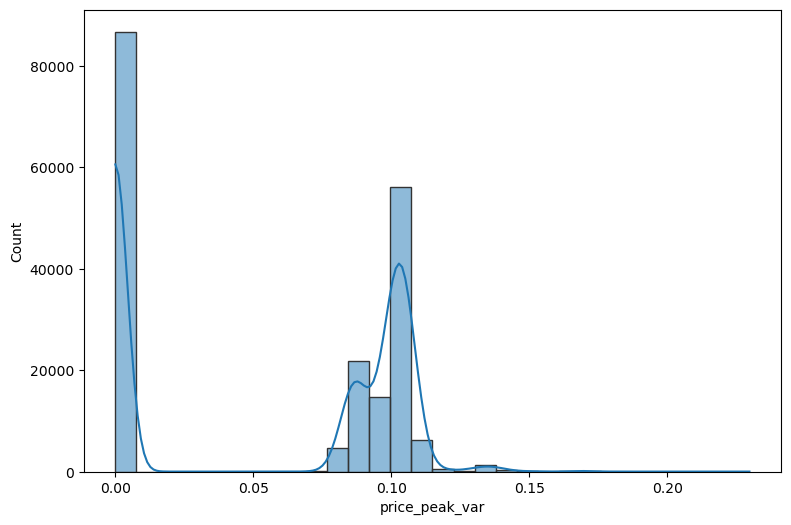

C:\Users\adnan\AppData\Local\Temp\ipykernel_35672\213875431.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=price_df, x=i, bins=30, kde=True, palette='husl', edgecolor='.2')


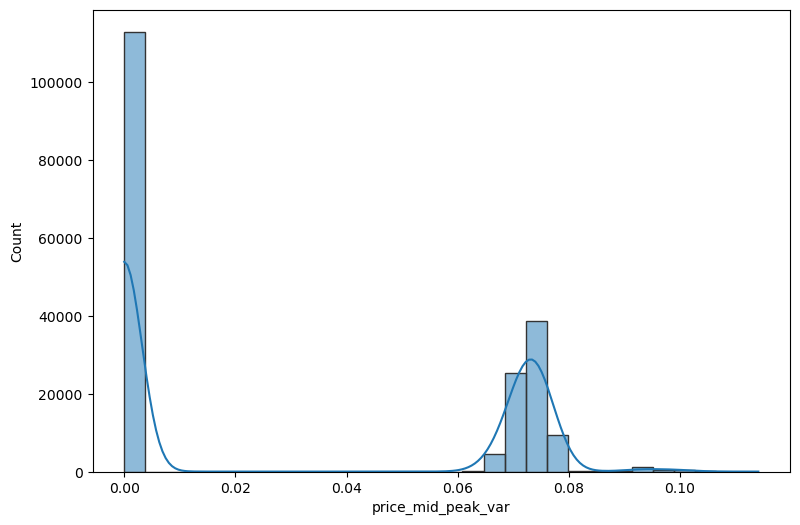

C:\Users\adnan\AppData\Local\Temp\ipykernel_35672\213875431.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=price_df, x=i, bins=30, kde=True, palette='husl', edgecolor='.2')


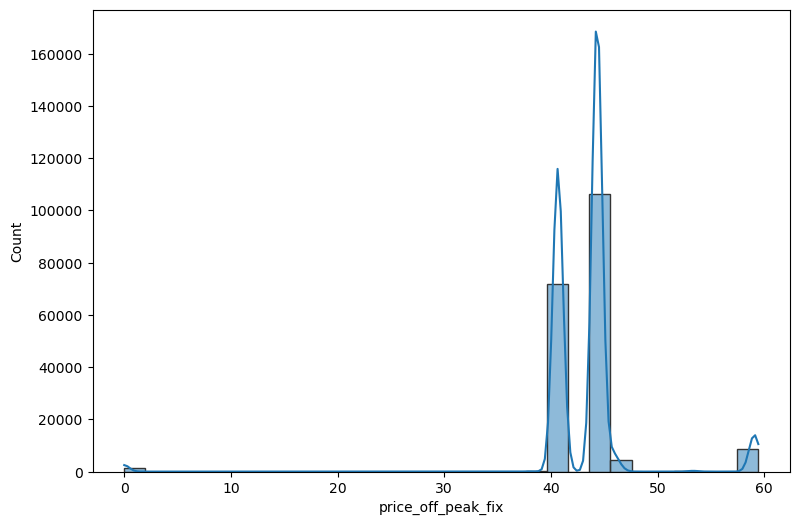

C:\Users\adnan\AppData\Local\Temp\ipykernel_35672\213875431.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=price_df, x=i, bins=30, kde=True, palette='husl', edgecolor='.2')


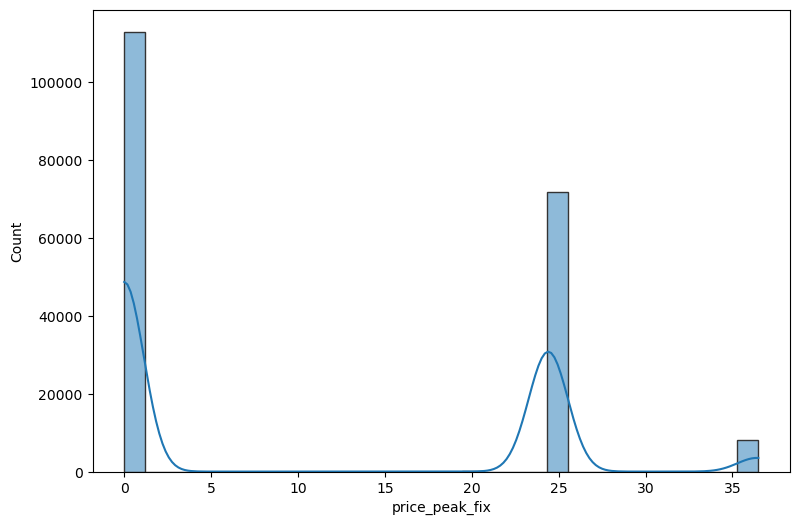

C:\Users\adnan\AppData\Local\Temp\ipykernel_35672\213875431.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=price_df, x=i, bins=30, kde=True, palette='husl', edgecolor='.2')


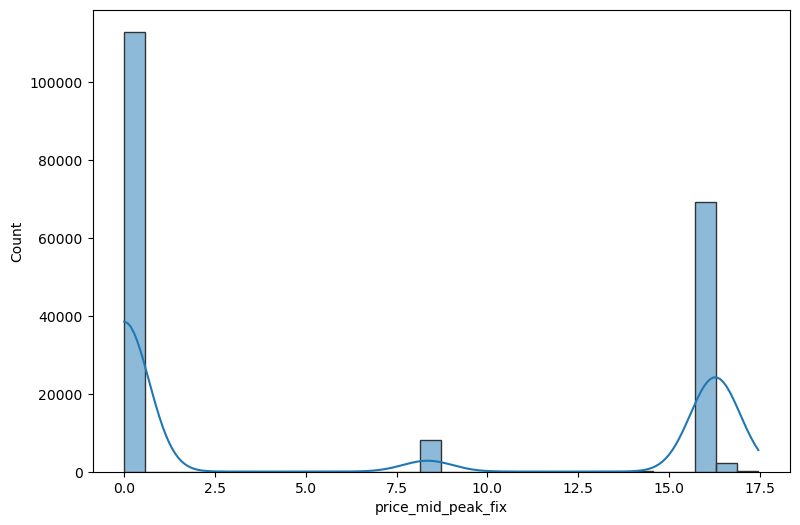

In [ ]:
price_col = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var','price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for i in price_col:
    plt.figure(figsize=(9, 6))
    sns.histplot(data=price_df, x=i, bins=30, kde=True, palette='husl', edgecolor='.2')
    plt.show()

### Hypothesis Testing

- Null Hypothesis (𝐻0): There is no significant relationship between price and churn rate.
- Alternative Hypothesis (𝐻1): There is a significant relationship between price and churn rate.
In hypothesis testing, a p-value less than the chosen significance level (commonly 0.05) indicates that we reject the null hypothesis in favor of the alternative hypothesis.


In [135]:
from scipy.stats import ttest_ind

hypothesis_df = pd.merge(price_df.groupby('id').mean(), client_df[['id','churn']], on="id")
columns = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
           'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for column in columns:
    ttest_result = ttest_ind(hypothesis_df[hypothesis_df['churn']==0][column],
                             hypothesis_df[hypothesis_df['churn']==1][column], 
                             equal_var=False)
    print(column)
    print(ttest_result)
    print("------------------------")
    

price_off_peak_var
TtestResult(statistic=0.8211123599141759, pvalue=0.41169173776073953, df=1787.9421954551278)
------------------------
price_peak_var
TtestResult(statistic=-3.5426368995008812, pvalue=0.0004066588047157523, df=1729.49546852865)
------------------------
price_mid_peak_var
TtestResult(statistic=-5.492976113937087, pvalue=4.544122703842065e-08, df=1717.587331911206)
------------------------
price_off_peak_fix
TtestResult(statistic=-2.773806423387593, pvalue=0.005588180822944836, df=2155.9871854468606)
------------------------
price_peak_fix
TtestResult(statistic=-5.5630042315334345, pvalue=3.070692292051358e-08, df=1715.877945724814)
------------------------
price_mid_peak_fix
TtestResult(statistic=-5.313028093578065, pvalue=1.2187439227124395e-07, df=1720.7243538215323)
------------------------


In [137]:

def hypothesis_test(df, columns, n_bootstrap=10000):

    # Split the data into two separate groups
    churn = df[df['churn'] == 1]
    ret = df[df['churn'] == 0]

    # Create subplots for visualization
    fig, ax = plt.subplots(3, 2, figsize=(13, 11), dpi=200)
    ax = ax.flatten()  # Flatten axes array for easy indexing
    
    for i, column in enumerate(columns):
        # Calculate observed means
        churn_mean = churn[column].mean()
        ret_mean = ret[column].mean()

        # Bootstrap sampling
        churn_bootstrap_means = [np.random.choice(churn[column], size=len(churn[column]), replace=True).mean() for _ in range(n_bootstrap)]
        ret_bootstrap_means = [np.random.choice(ret[column], size=len(ret[column]), replace=True).mean() for _ in range(n_bootstrap)]

        # Calculate observed difference and null distribution
        mean_diff = churn_mean - ret_mean
        null_diff = np.array(churn_bootstrap_means) - np.array(ret_bootstrap_means)

        # Calculate p-value (two-tailed)
        p_value = (np.abs(null_diff) >= np.abs(mean_diff)).mean()

        # Confidence interval
        CI = np.percentile(null_diff, [2.5, 97.5])

        # Print results
        print(f"{column}")
        print(f"Observed Mean Difference: {mean_diff:.4f}")
        print(f"Bootstrap p-value: {p_value:.4f}")
        print(f"95% Confidence Interval: {CI}\n")

        # Plot bootstrap distribution
        ax[i].hist(null_diff, bins=50, alpha=0.7, color='blue', edgecolor='black', density=True)
        ax[i].axvline(mean_diff, color='red', linestyle='--', label='Observed Mean Diff')
        ax[i].axvline(CI[0], color='green', linestyle='--', label='95% CI Lower')
        ax[i].axvline(CI[1], color='green', linestyle='--', label='95% CI Upper')
        ax[i].set_title(f"Bootstrap Distribution: {column}")
        ax[i].legend()

    # Adjust subplot layout
    plt.tight_layout()
    plt.show()


price_off_peak_var
Observed Mean Difference: -0.0005
Bootstrap p-value: 0.5606
95% Confidence Interval: [-0.00163779  0.00068163]

price_peak_var
Observed Mean Difference: 0.0050
Bootstrap p-value: 0.5039
95% Confidence Interval: [0.00228153 0.00775165]

price_mid_peak_var
Observed Mean Difference: 0.0056
Bootstrap p-value: 0.4990
95% Confidence Interval: [0.00361889 0.00764897]

price_off_peak_fix
Observed Mean Difference: 0.2581
Bootstrap p-value: 0.4988
95% Confidence Interval: [0.07781748 0.44161505]

price_peak_fix
Observed Mean Difference: 1.9226
Bootstrap p-value: 0.4978
95% Confidence Interval: [1.25310812 2.59487841]

price_mid_peak_fix
Observed Mean Difference: 1.1765
Bootstrap p-value: 0.4973
95% Confidence Interval: [0.75359244 1.6165703 ]



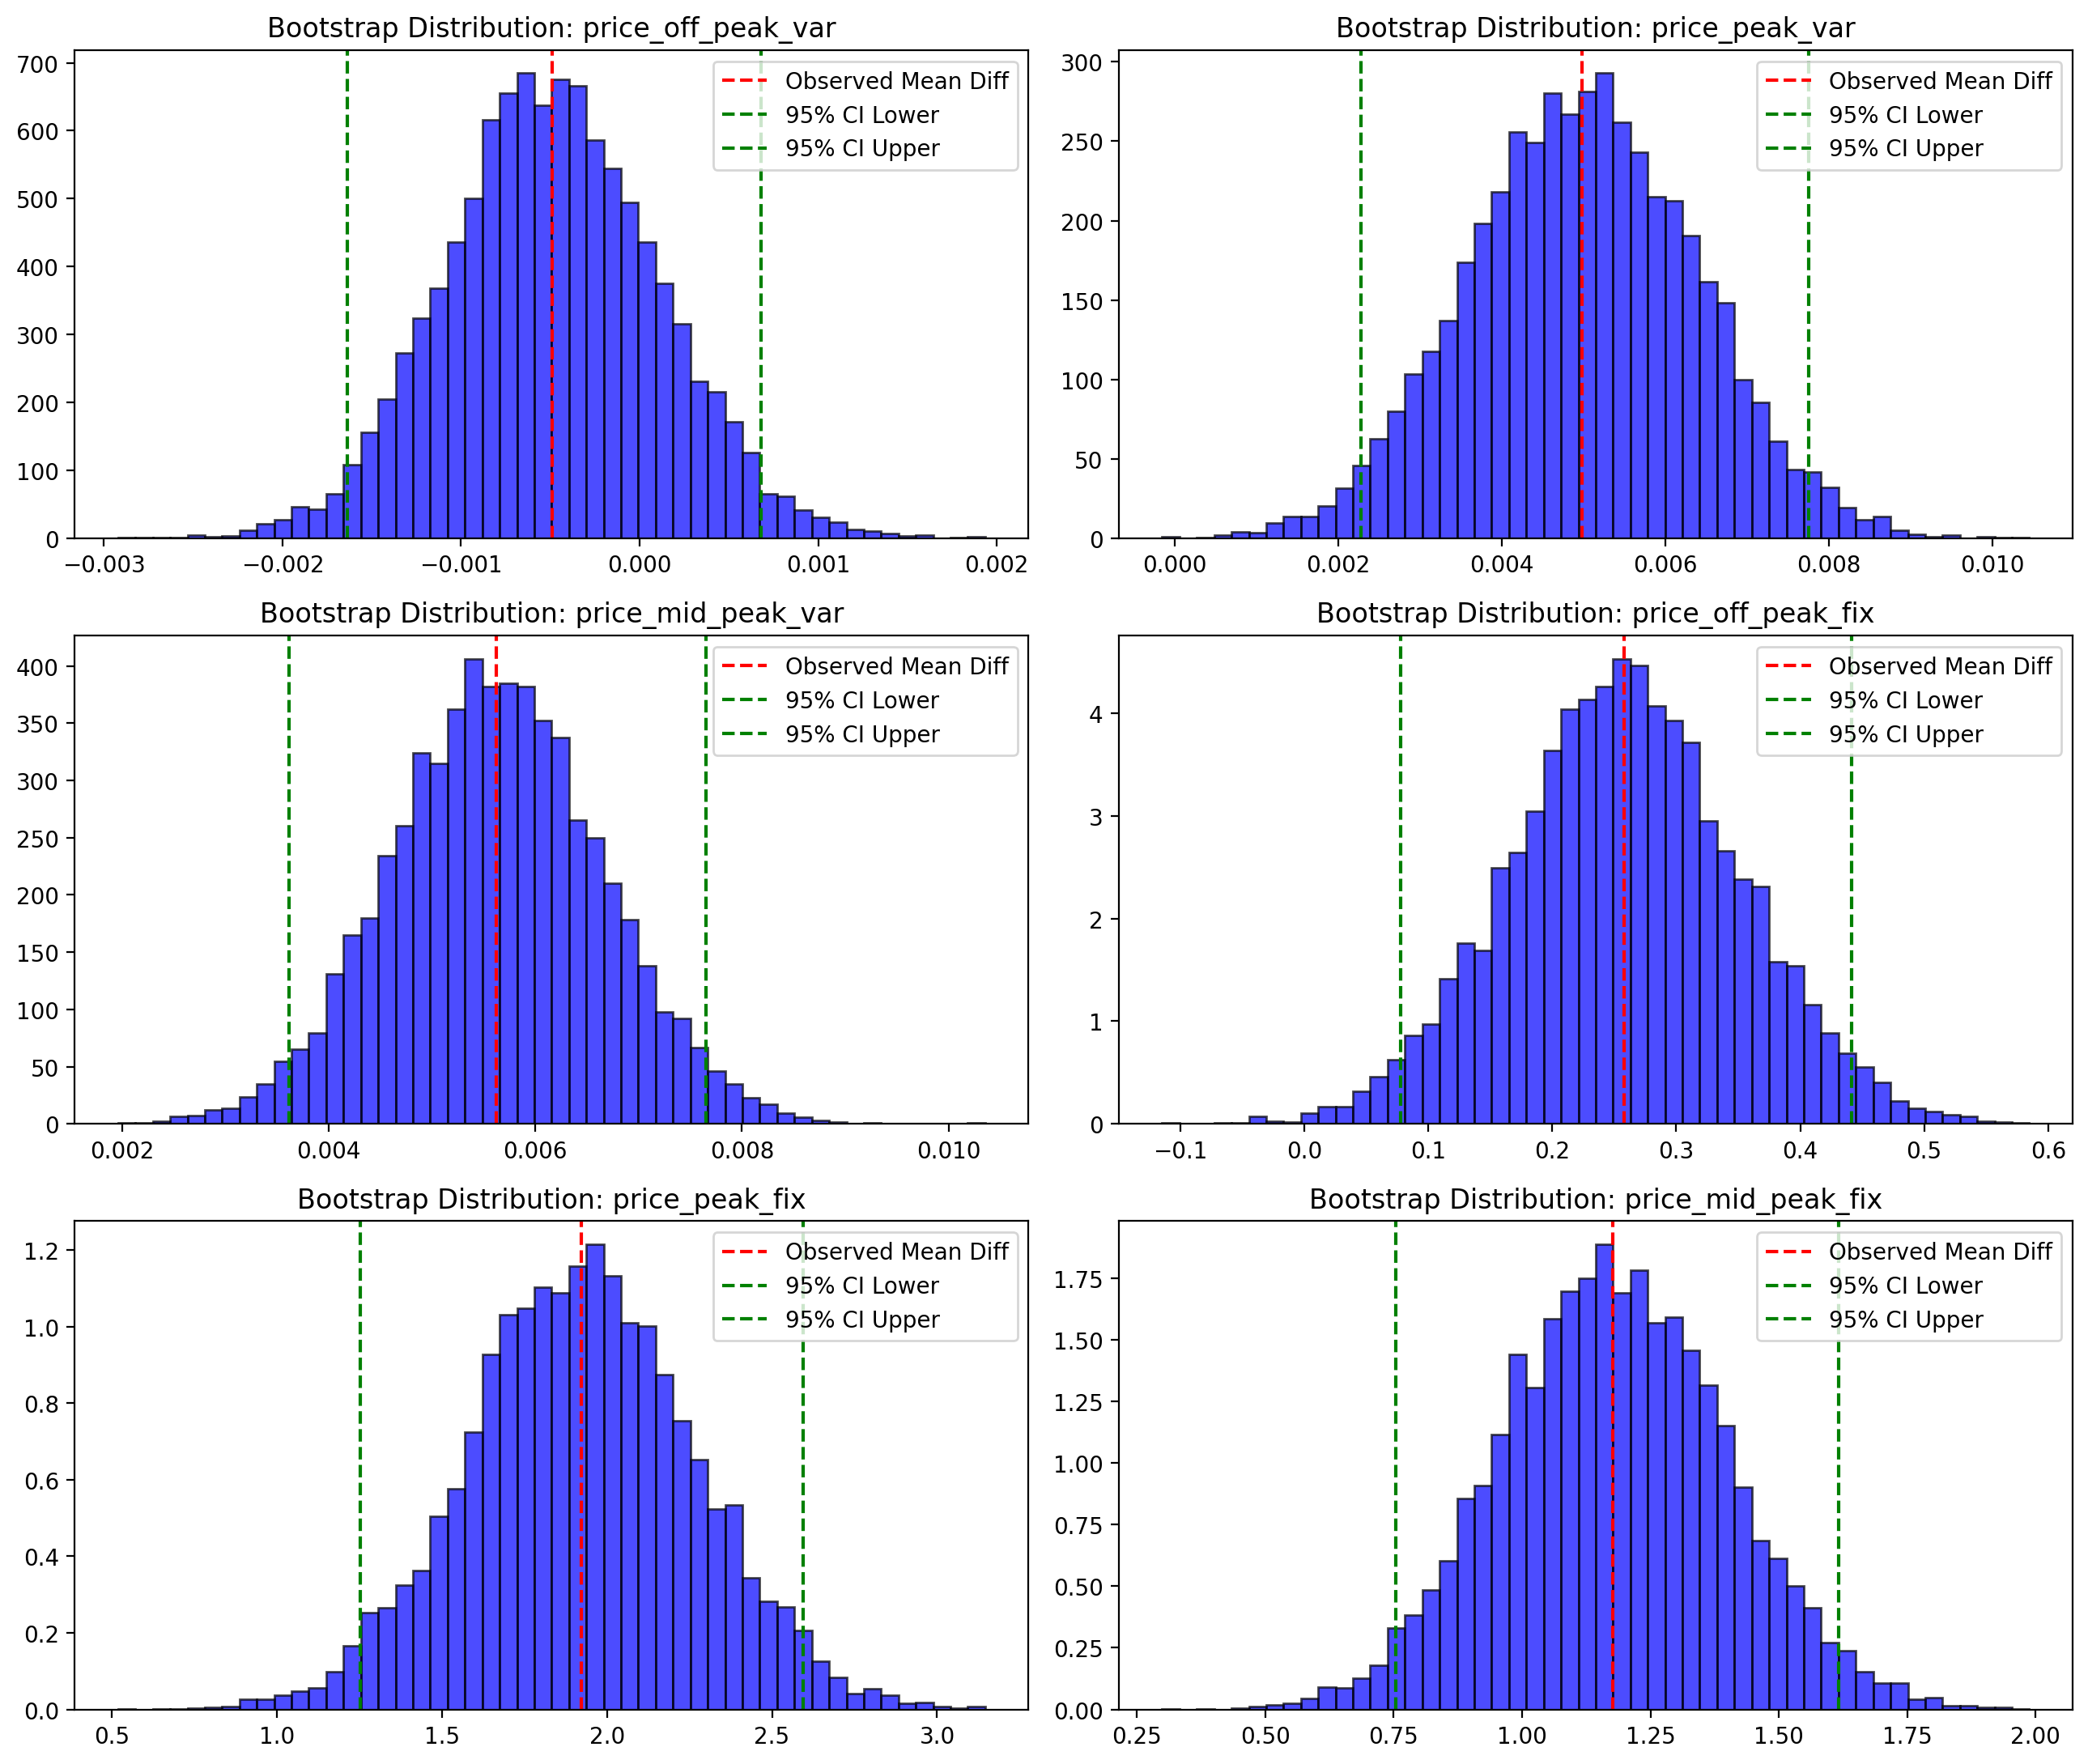

In [139]:
hypothesis_test(hypothesis_df, columns)

**Insights**
- The p-values for all tests are greater than 0.05, which means we fail to reject the null hypothesis for all variables.
- This implies that there is no statistically significant relationship between any of the price variables and churn rate based on analysis.